In [13]:
using FileIO
using PyPlot
using LaTeXStrings
using MixedLayerModel

In [14]:
function profile(u, maxz)
    zi, hM, qM, SST = u;
    
    stepz = 1.0;
    z1 = collect(0:stepz:zi); z2 = collect(zi:stepz:maxz);
    z = [z1;z2];
    
    h = [hM .* ones(length(z1)); h_ft(z2, p)];
    qt = [qM .* ones(length(z1)); q_ft(z2, p)];
    
    θ = theta(z,h,qt); # K
    
    T = temp.(z,h,qt);
    ql = q_l(z,T,qt) * 1000.0; # kg/kg -> g/kg
    
    return z, θ, ql 
end

profile (generic function with 1 method)

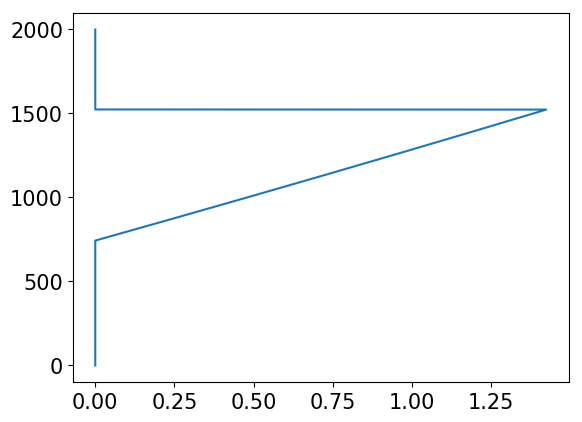

Dict{String,Any}("LHF" => 86.72086530123651,"OHU" => -96.04316746682605,"we" => 0.004571395976577426,"RHsurf" => 0.6738429556376165,"code" => :Success,"zc" => 780.4490920664921,"SHF" => -5.767621063730118,"u0" => [900.0, 313275.2385058754, 0.009649295402350162, 290.0],"ΔR" => 71.55211208095858,"zb" => 743.3410404758142,"uf" => [1523.7901325423063, 312891.8749849847, 0.008452730443426744, 290.0],"du/u" => [1.6786399885988278e-11, 1.8664973476533412e-13, 1.1060898951916517e-12, 0.0])


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x192a51588>

In [22]:
o = load("../experiments/output/co2_400.jld2")
u = o["uf"];
println(o)
maxz = 2000;
p = basic_params();

z, θ, ql = profile(u, maxz);

plot(ql, z)

In [23]:
path = "../experiments/output/";
out400 = load(path*"co2_400.jld2");

co2_vals = [500,600,700,800];
exps = path*"co2_upstep_".*string.(co2_vals).*".jld2";
exps_fixSST = path*"co2_upstep_fixSST_".*string.(co2_vals).*".jld2";

out = load.(exps);
out_fixSST = load.(exps_fixSST);

pushfirst!(out, out400);
pushfirst!(out_fixSST, out400);
pushfirst!(co2_vals, 400);

p = basic_params();

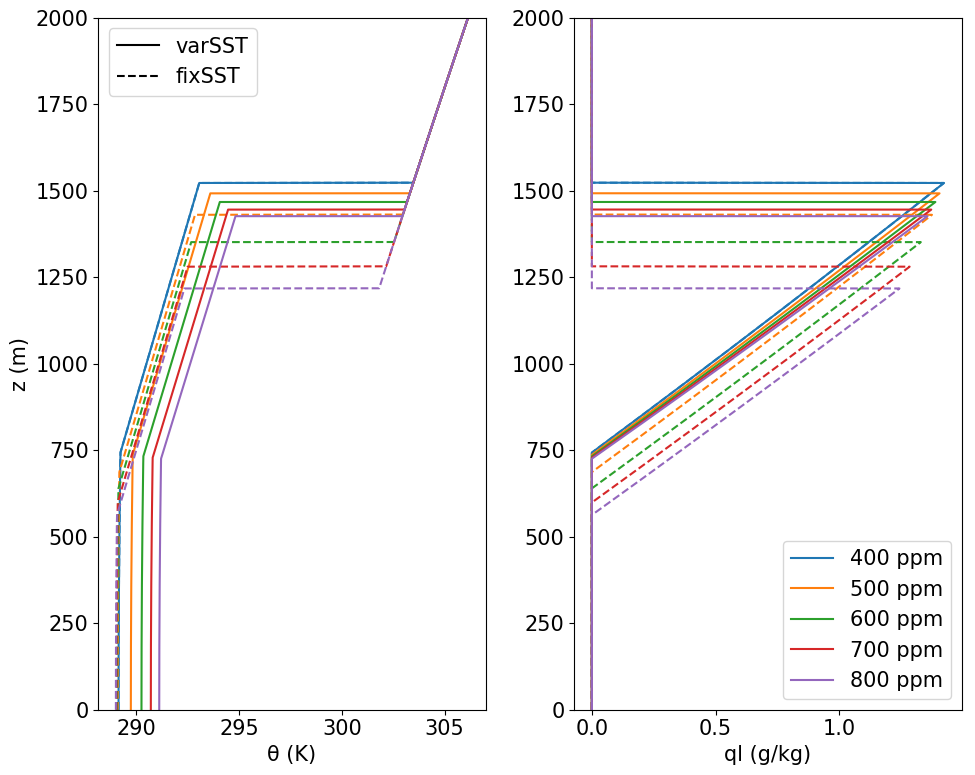

In [24]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams");
rcParams["font.size"] = 15;

fig1 = figure(figsize=(10,8));
ax1 = subplot(121);
ax2 = subplot(122);

maxz = 2000;

for (i,co2i) in enumerate(co2_vals)
    col = "C"*string(i-1);
    
    outi = out[i];
    u = outi["uf"];
    z, θ, ql = profile(u, maxz);
    ax1.plot(θ, z, color=col);
    ax2.plot(ql, z, color=col, label=string(co2i)*" ppm");
    
    outi = out_fixSST[i];
    u = outi["uf"];
    z, θ, ql = profile(u, maxz);
    ax1.plot(θ, z, "--", color=col);
    ax2.plot(ql, z, "--", color=col);
end

p1 = ax1.plot([290,300],[-10,-10],"k-",label="varSST")
p2 = ax1.plot([290,300],[-10,-10],"k--",label="fixSST")
ax1.legend();

ax1.set_ylim([0,maxz]); ax2.set_ylim([0,maxz]);
ax1.set_ylabel("z (m)");
ax1.set_xlabel("θ (K)"); ax2.set_xlabel("ql (g/kg)");
ax2.legend();

tight_layout();
savefig("./figures/profiles_by_co2.png",dpi=400)
show()